Student Number: GH1043274

Student Name: Carl Jhon D. Odicta

Assessment Title: Global Passenger Data Exploration

Module Code: M504B

Module Title: AI and Applications

Module Tutor: Prof. Amirhossein Jamalian

Date Submitted: September 25, 2025

# **Global Passenger Data Exploration**

**Business Case**

We are a data scientist working for the International Air Transport Association (IATA) and are tasked to explore their Global Passenger Data in order to understand passenger behavior and statistics so they could prepare for the predicted growth of the Airline Industry in the coming years.

They would also like to understand more about the other variables that are also related and could have some effects to the passengers - such as the Airports, Pilots, and Flight details.

**Dataset**

We were given the "Airline Dataset" to do our analysis on. Despite it's name, it is more of a passenger dataset since each rows is associated with a passenger flight details.

The dataset has the following variables:
"
* Passenger ID - Unique identifier for each passenger
* First Name - First name of the passenger
* Last Name - Last name of the passenger
* Gender - Gender of the passenger
* Age - Age of the passenger
* Nationality - Nationality of the passenger
* Airport Name - Name of the airport where the passenger boarded
* Airport Country Code - Country code of the airport's location
* Country Name - Name of the country the airport is located in
* Airport Continent - Continent where the airport is situated (3 letter code)
* Continents - Continents involved in the flight route
* Departure Date - Date when the flight departed. This dataset only includes 2022 data.
* Arrival Airport - Destination airport of the flight. (3 letter iata code)
* Pilot Name - Name of the pilot operating the flight
* Flight Status - Current status of the flight
"

Source: https://www.kaggle.com/datasets/iamsouravbanerjee/airline-dataset/data

Note: This is only a synthetic dataset and may not reflect real-life scenario

We also used the "Airports" dataset from OurAirports.com for mapping of IATA Codes to Airport Name

Source: https://ourairports.com/help/data-dictionary.html

**Business Questions**

This exploration will try to answer the following business questions:
1. How many times does a person travel in 2022?
2. What is the distribution of the passengers in terms of age and gender?
3. What are the top 5 countries and nationalities of the passengers?
4. What is the monthly trend and performance? (Flight trend and %chance to have a on-time/delayed/cancelled flight)
5. What is the best performing airport in terms of its reliablity?
6. What is the route with the most passengers?

**Preparation**

First, we need to load the packages and dataset that will be used in the analysis

In [105]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [106]:
# Load Airline Dataset
df = pd.read_csv('/content/Airline Dataset Updated - v2.csv')

In [107]:
print(df.shape)
display(df.head(2))


(98619, 15)


,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time


**Data Cleaning and Preprocessing**

Next, we need to only check for duplicates and missing values, since we will only be exploring the data in this assessment.

In [108]:
#Checking for Duplicates
print("Number of Duplicates:", df.duplicated().sum())

Number of Duplicates: 0


In [109]:
#Checking for Missing Values
print("Number of Missing Value:\n" + str(df.isnull().sum()))

Number of Missing Value:
Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64


No duplicates and missing values found.

If we detected duplicates or missing values we can remove or replace them using the following code:

  df = df.drop_duplicates() #To remove duplicates
  
  df = df.dropna() #To remove all rows with atleast 1 missing values
  
  df = df.fillna() #Replace missing values

**Data Exploration**

We will explore and visualize our data in order to understand and answer our business questions

1. Passenger Flight Frequency

In [110]:
# Passenger Frequency
df['Person'] = df['First Name'] + ' ' + df['Last Name']
flights_per_person = df.groupby('Person').size().reset_index(name='Total_Flights')
average_flights_per_person = flights_per_person['Total_Flights'].mean()
print(f"Average number of flights per person in 2022: {average_flights_per_person:.2f} \n")

top_persons = flights_per_person.sort_values(by='Total_Flights', ascending=False).head(5)
print(top_persons.to_string(index=False))

# Trying same process for Pilot Flight Frequency
flights_per_pilot = df.groupby('Pilot Name').size().reset_index(name='Total_Flights')
average_flights_per_pilot = flights_per_pilot['Total_Flights'].mean()
print(f"\n Average number of flights per pilot in 2022: {average_flights_per_pilot:.2f}\n" )

top_pilots = flights_per_pilot.sort_values(by='Total_Flights', ascending=False).head(5)
print(top_pilots.to_string(index=False))


Average number of flights per person in 2022: 1.00 

        Person         Total_Flights
          Ollie Sidle       2       
         Rance Evetts       2       
       Brig Shuxsmith       2       
Christabella Reubbens       2       
       Ertha Feldbaum       2       

 Average number of flights per pilot in 2022: 1.00

   Pilot Name    Total_Flights
   Kally Askell       2       
    Aline Delap       2       
Byrle Schooling       2       
 Kimmie Godding       2       
  Ethan Desbrow       2       


In 2022, most passengers only flew once that year on average. (Maximum of twice per year as seen in the top passengers table) Which is reasonable given that airports are just starting to open up that year after the pandemic.

Similarly, Pilots also flew only once that year on average (max of 2).

2. Age and Gender Distribution of Passengers

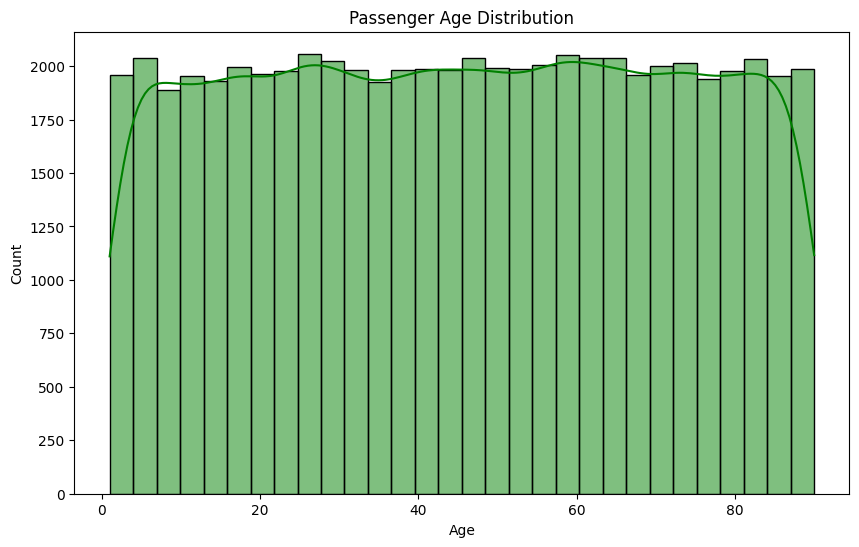

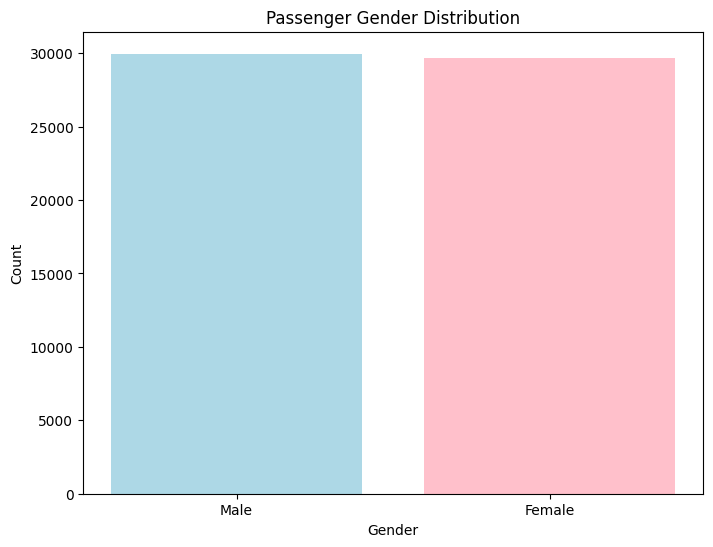

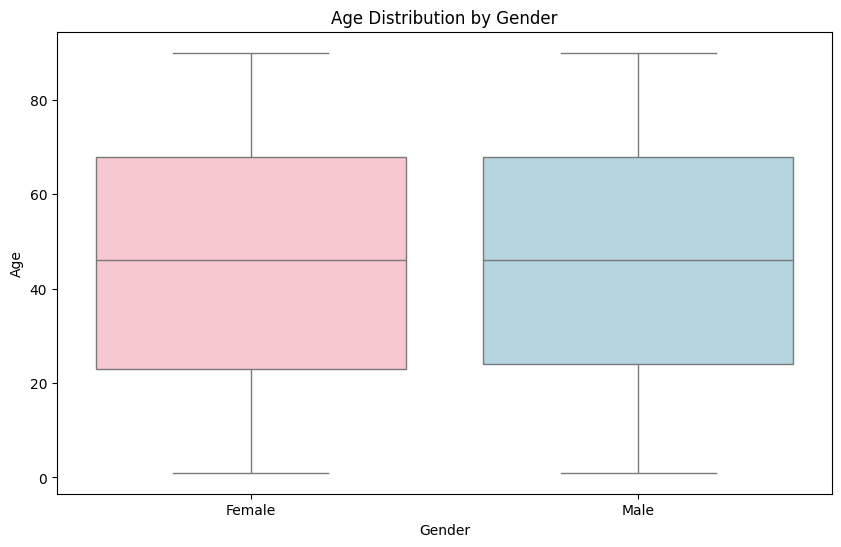

In [117]:
# Age Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, kde=True, color='green')
plt.title("Passenger Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Gender Distribution
plt.figure(figsize=(8,6))
gender_color_map = {'Male': 'lightblue', 'Female': 'pink'}
for gender, color in gender_color_map.items():
    subset = df[df['Gender'] == gender]
    plt.bar(gender, subset.shape[0], color=color)

plt.title("Passenger Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Age Distribution by Gender
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender', y='Age', data=df, hue='Gender', palette=gender_color_map, dodge=False)
plt.title("Age Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.legend([],[], frameon=False)
plt.show()


Distribution of passengers across ages and gender are almost equal.

3. Top 5 Countries and Nationalities with the Most Passenger

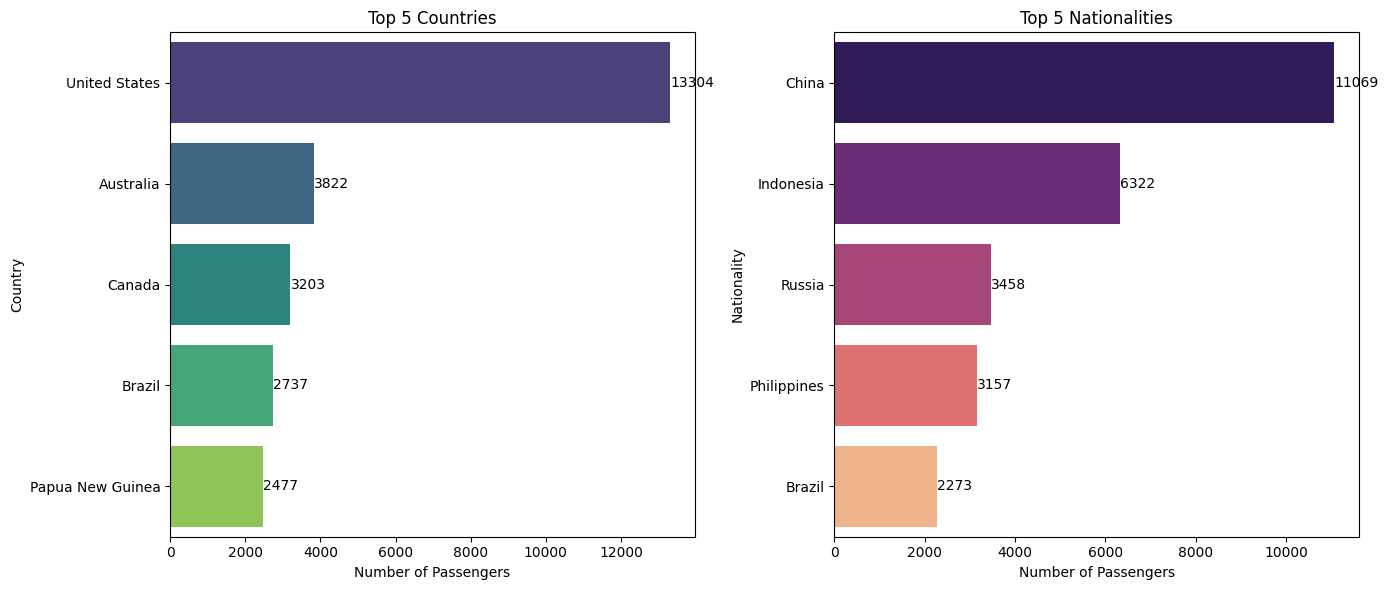

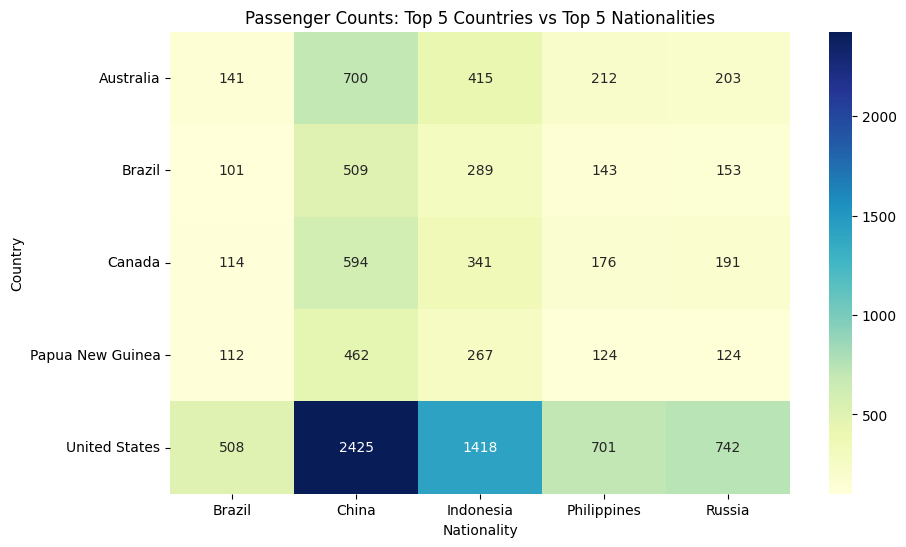

In [123]:
# Top 5 Countries and Nationalities
top_countries = df['Country Name'].value_counts().head(5)
top_nationalities = df['Nationality'].value_counts().head(5)

plt.figure(figsize=(14,6))

# Top countries bar chart
plt.subplot(1,2,1)
sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    hue=top_countries.index,
    dodge=False,
    palette="viridis",
    legend=False
)
plt.title("Top 5 Countries")
plt.xlabel("Number of Passengers")
plt.ylabel("Country")

for i, value in enumerate(top_countries.values):
    plt.text(value + 0.5, i, str(value), va='center')

# Top nationalities bar chart
plt.subplot(1,2,2)
sns.barplot(
    x=top_nationalities.values,
    y=top_nationalities.index,
    hue=top_nationalities.index,
    dodge=False,
    palette="magma",
    legend=False
)
plt.title("Top 5 Nationalities")
plt.xlabel("Number of Passengers")
plt.ylabel("Nationality")

for i, value in enumerate(top_nationalities.values):
    plt.text(value + 0.5, i, str(value), va='center')

plt.tight_layout()
plt.show()


# Passenger Counts by Country and Nationality

  # Filter and Pivot
filtered_df = df[
    df['Country Name'].isin(top_countries.index) &
    df['Nationality'].isin(top_nationalities.index)
]

heatmap_data = filtered_df.pivot_table(
    index='Country Name',
    columns='Nationality',
    values='Passenger ID',
    aggfunc='count',
    fill_value=0
)
# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Passenger Counts: Top 5 Countries vs Top 5 Nationalities")
plt.xlabel("Nationality")
plt.ylabel("Country")
plt.show()


Top 5 Countries with the Most Passengers are the United States, Australia, Canada, Brazil, and Papua New Guinea.

Top 5 Nationalities with the Most Passengers are China, Indonesia, Russia, Philippines Brazil

We can see that the top countries and nationalities, doesn't match and are different. We can observe that the top countries for passengers are the most developed countries but majority of the travelers doesn't come from there but rather mostly asians.

This is also reflective in the heatmap where we can see that chinese, indonesians, and russians are the top nationalities of passengers from the United States.

4. Flight Status and Trends

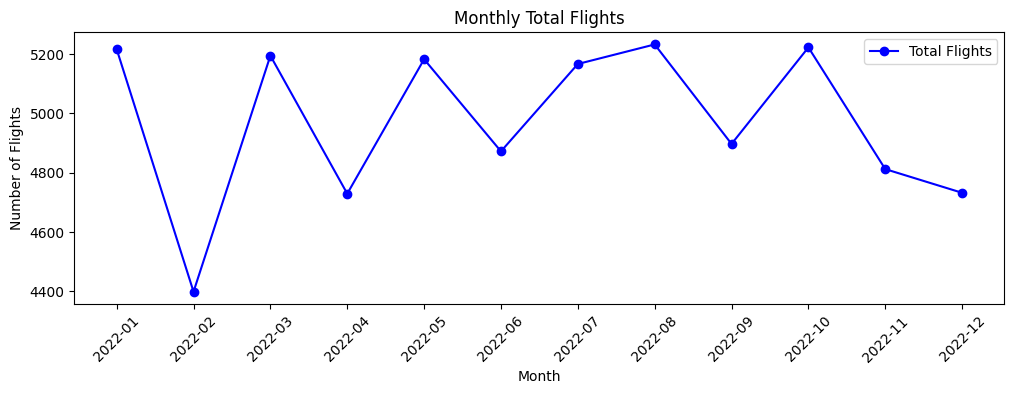

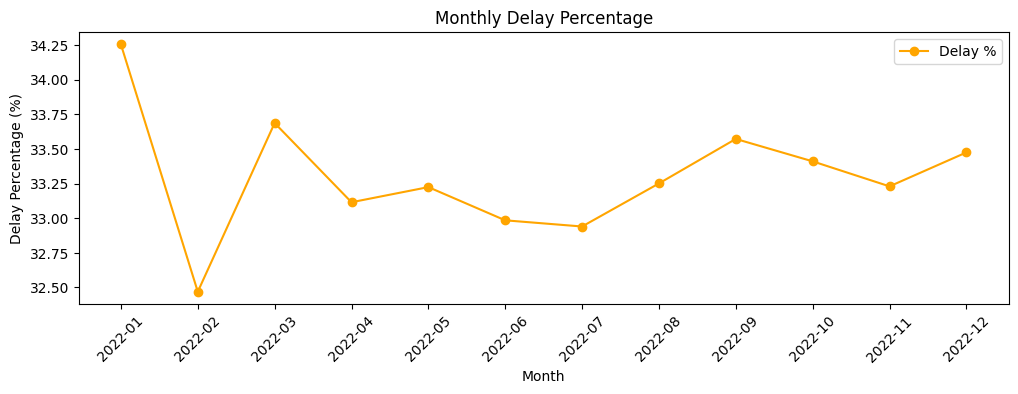

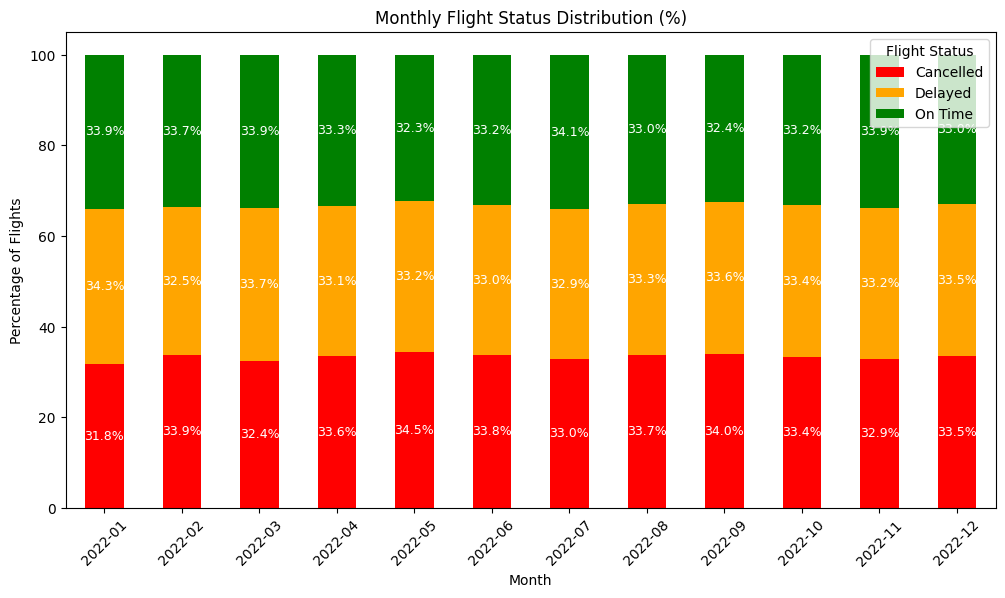

In [125]:
# Transform Departure Date to datetime
df['Departure Date'] = pd.to_datetime(df['Departure Date'], errors='coerce')
df = df.dropna(subset=['Departure Date', 'Flight Status'])

df['Flight Status'] = df['Flight Status'].str.title()  # e.g., 'Delayed', 'On-Time', 'Cancelled'

# Aggregate Flight Status Counts per Month
df['Month'] = df['Departure Date'].dt.to_period('M')
status_counts = df.groupby(['Month', 'Flight Status'])['Passenger ID'].count().unstack(fill_value=0)

# Total Flights
total_flights = status_counts.sum(axis=1)
plt.figure(figsize=(12,4))
plt.plot(total_flights.index.astype(str), total_flights.values, marker='o', color='blue', label='Total Flights')
plt.title("Monthly Total Flights")
plt.xlabel("Month")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.legend()
plt.subplots_adjust(bottom=0.2)
plt.show()

# Percentage of Delayed Flights
delayed_flights = status_counts.get('Delayed', pd.Series(0, index=status_counts.index))
delay_percentage = (delayed_flights / total_flights * 100).fillna(0)
plt.figure(figsize=(12,4))
plt.plot(delay_percentage.index.astype(str), delay_percentage.values, marker='o', color='orange', label='Delay %')
plt.title("Monthly Delay Percentage")
plt.xlabel("Month")
plt.ylabel("Delay Percentage (%)")
plt.xticks(rotation=45)
plt.legend()
plt.subplots_adjust(bottom=0.2)
plt.show()

# Flight Status
status_percent = status_counts.div(status_counts.sum(axis=1), axis=0) * 100
colors = {'On Time': 'green', 'Delayed': 'orange', 'Cancelled': 'red'}
color_list = [colors.get(x, 'gray') for x in status_percent.columns]

ax = status_percent.plot(kind='bar', stacked=True, figsize=(12,7), color=color_list)
plt.title("Monthly Flight Status Distribution (%)")
plt.xlabel("Month")
plt.ylabel("Percentage of Flights")
plt.xticks(rotation=45)
plt.legend(title="Flight Status")

for i, month in enumerate(status_percent.index):
    bottom = 0
    for status in status_percent.columns:
        value = status_percent.loc[month, status]
        if value > 0:
            plt.text(i, bottom + value/2, f"{value:.1f}%", ha='center', va='center', color='white', fontsize=9)
            bottom += value

# Adjust Visualization
plt.subplots_adjust(bottom=0.2)
plt.show()


Monthly total flights ranges in between 4000-6000 with a trough at February. Across the year, % of delayed flights remain almost constant at around 30-35%.

The chances of a flight being cancelled, delayed, or successfully on time is almost equal at around 30% each for any given month.

**note that this may not represent real life information since the data is synthetic. I only noticed now unfortunately. Also trends are more reliable if evaluated using data of atleast 3 years. This data is only for 2022.

5. Airport Reliability

In [114]:
MIN_PASSENGERS = 10 #Filter minimum number of passengers
airports = pd.read_csv('/content/airports.csv', dtype=str)

# Reference table for Country Map
country_map = df[['Airport Country Code', 'Country Name']].drop_duplicates()

# Departure Airport Reliability
departure = (
    df.groupby('Airport Name', as_index=False)
      .agg(
          Total_Passengers=('Passenger ID', 'count'),
          On_Time_Passengers=('Flight Status', lambda x: (x == 'On Time').sum()),
          Airport_Country_Code=('Airport Country Code', 'first')
      )
      .merge(country_map, left_on='Airport_Country_Code', right_on='Airport Country Code', how='left')
)

departure = departure[departure['Total_Passengers'] >= MIN_PASSENGERS]
departure['Reliability (%)'] = (departure['On_Time_Passengers'] / departure['Total_Passengers'] * 100).round(2)

departure_top5 = departure.sort_values(['Reliability (%)', 'On_Time_Passengers'], ascending=[False, False]).head(5)

print("Top 5 Departure Airports by Reliability\n")
print(departure_top5[['Airport Name', 'Country Name', 'Total_Passengers', 'On_Time_Passengers', 'Reliability (%)']].to_string(index=False))
print("\n" + "-"*130 + "\n")

# Arrival Airport Reliability
arrival = (
    df.groupby('Arrival Airport', as_index=False)
      .agg(
          Total_Passengers=('Passenger ID', 'count'),
          On_Time_Passengers=('Flight Status', lambda x: (x == 'On Time').sum())
      )
)

arrival = arrival[arrival['Total_Passengers'] >= MIN_PASSENGERS]
arrival['Reliability (%)'] = (arrival['On_Time_Passengers'] / arrival['Total_Passengers'] * 100).round(2)

  # Mapping of Airport Name
arrival = arrival.merge(
    airports[['iata_code', 'name', 'iso_country']],
    left_on='Arrival Airport',
    right_on='iata_code',
    how='left'
).rename(columns={'name': 'Airport Name', 'iso_country': 'Airport Country Code'})

  # Mapping of Country Name
arrival = arrival.merge(country_map, on='Airport Country Code', how='left')

  # correction for missing values
arrival['Airport Name'] = arrival['Airport Name'].fillna(arrival['Arrival Airport'])
arrival['Country Name'] = arrival['Country Name'].fillna('Unknown')

arrival_top5 = arrival.sort_values(['Reliability (%)', 'On_Time_Passengers'], ascending=[False, False]).head(5)

print("Top 5 Arrival Airports by Reliability (with full name + country)\n")
print(arrival_top5[['Airport Name', 'Country Name', 'Total_Passengers', 'On_Time_Passengers', 'Reliability (%)']].to_string(index=False))


Top 5 Departure Airports by Reliability

           Airport Name                        Country Name              Total_Passengers  On_Time_Passengers  Reliability (%)
Sulphur Springs Municipal Airport                         United States         10                 8               80.00      
                Jeongseok Airport                    Korea, Republic of         12                 9               75.00      
                  Machado Airport                                Brazil         12                 9               75.00      
              N'Kolo-Fuma Airport Congo, The Democratic Republic of the         11                 8               72.73      
               Ouro Sogui Airport                               Senegal         11                 8               72.73      

----------------------------------------------------------------------------------------------------------------------------------

Top 5 Arrival Airports by Reliability (with full name + country)

Reliablity is defined as the probablity of arriving on-time on a flight departing from / arriving to a particular airport

For Airports with more than 10 passengers,

Sulphur Springs Municipal Airport in the United States is the most reliable Airport to depart from at 80%.

Sulphur Springs Municipal Airport in the United States is also the most reliable Airport to arrive to at 80%.



6. Route Analysis (using OurAirport Dataset)

In [116]:
# Load datasets
airline_df = pd.read_csv("/content/Airline Dataset Updated - v2.csv")
airports_df = pd.read_csv("/content/airports.csv")

# Mapping
airline_df['Departure Country Name'] = airline_df['Country Name']

airport_to_country_code = airports_df[['iata_code', 'iso_country']].dropna(subset=['iata_code']).set_index('iata_code')['iso_country'].to_dict()
airline_df['Arrival Country Code Temp'] = airline_df['Arrival Airport'].map(airport_to_country_code)

country_code_to_name = airline_df[['Airport Country Code', 'Country Name']].drop_duplicates().set_index('Airport Country Code')['Country Name'].to_dict()

airline_df['Arrival Country Name'] = airline_df['Arrival Country Code Temp'].map(country_code_to_name)

# Count rows before filtering
rows_before = len(airline_df)

# Count and remove rows with missing arrival country
missing_arrival = airline_df['Arrival Country Name'].isna().sum()
airline_df = airline_df.dropna(subset=['Arrival Country Name'])

# Count and remove domestic flights
domestic_flights = (airline_df['Departure Country Name'] == airline_df['Arrival Country Name']).sum()
airline_df = airline_df[airline_df['Departure Country Name'] != airline_df['Arrival Country Name']]

# Count rows after filtering
rows_after = len(airline_df)
rows_dropped_total = rows_before - rows_after

# Summary
print(f"Total rows before filtering: {rows_before}")
print(f"Rows dropped due to missing arrival country: {missing_arrival}")
print(f"Rows dropped due to domestic flights: {domestic_flights}")
print(f"Total rows dropped: {rows_dropped_total}")
print(f"Rows remaining (international flights with known arrival country): {rows_after}\n")

# Route
airline_df['Route'] = airline_df['Departure Country Name'] + " - " + airline_df['Arrival Country Name']

route_counts = airline_df.groupby('Route').size().reset_index(name='Flight Count')

route_counts = route_counts.sort_values(by='Flight Count', ascending=False)

# Display top 10 international routes
print(route_counts.head(10))


Total rows before filtering: 98619
Rows dropped due to missing arrival country: 5632
Rows dropped due to domestic flights: 92415
Total rows dropped: 98047
Rows remaining (international flights with known arrival country): 572

                Route               Flight Count
36           United States - China       39     
39       United States - Indonesia       33     
35          United States - Brazil       20     
38           United States - Egypt       17     
16         Indonesia - Timor-Leste       17     
42         United States - Myanmar       16     
25              Pakistan - Czechia       16     
15  Indonesia - Russian Federation       15     
17        Indonesia - Turkmenistan       15     
41      United States - Kyrgyzstan       14     


Majority of the passengers travelled domestically (~94%).

For international flights, US-China is the route with most passenger.

**Results**

From our analysis in answering the six(6) business questions provided we obtained clear insights on passenger behavior (for year 2022) and have observed the following results:
1. A passenger travelled only once a year, on average.
2. Passengers are evenly distributed across age and gender
3. Passengers travel more often to more developed countries (i.e. US, Australia, Canada) and are more often Asian by nationality (i.e. Chinese, Indonesian, Filipino)
4. The chances your flight to be on-time, delayed, or cancelled are almost equal (~30%-35%), this is constant regardless of month of year.
5. Airports from the US are more reliable, meaning a higher chance for your flight to be on-time.
6. Majority of the passengers travel domestically (~94%). and majority of the Passengers who travel internationally are coming from the United States.

**Insights**

Based on the results of this analysis we can make the following business recommendations:
1. Devise strategies to encourage passengers to travel again. Most common of these strategy is to introduce loyalty rewards and bundles.
2. Efforts targetting a specific age group or gender will be less effective given that all are equally represented. Instead focus on more generalized approach.
3. Focus efforts on improving passenger capacity for less developed countries to be able to accommodate more passengers. Such as in Asian countries where they are observed to travel more.
4. For the passengers - Always be ready for a possibility of a delayed or cancelled flights....unfortunately. For the airlines - they need to put extreme efforts to reduce cancellations and delays.
5. Promote International travel.

**Note (Limitations of this exercise)**

This exploration used the Airline Dataset from Kaggle and unfortunately, is a synthetic dataset. This means that the results may not be reflective of real world behavior.

I would like to leave this note here because based on my personal experience working in an airline company, results are very much different. For example of such difference is that in actual passenger data, there is always a strong seasonal effect, also flight cancellation is rare to happen, and many more differences.